#### Безусловная оптимизация. Методы 0-го порядка. Метод Монте-Карло

In [1]:
import numpy as np
np.printoptions(precision=3)
import matplotlib.pyplot as plt

from scipy import optimize

In [2]:
# функция генерации случайных точек в квадрате [x0-R/2, x0+R/2]
def genPoints(x0, R, N=25):
    points=[]
    for i in range(N):
        x = x0.copy()
        dx = np.random.uniform(-R/2, R/2, size=len(x))
        x += dx
        points.append(x)
    return np.array(points)

# функция реализации метода Монте-Карло
def MKarlo(f, x0, R, eps_R, N=25):
    f0 = f(x0)
    x_trace = [x0]
    while R > eps_R:
        new_pts = genPoints(x0, R=R, N=N)
        new_f = f(new_pts.T)
        best = np.argmin(new_f)
        if new_f[best] < f0:
            x0 = new_pts[best]
            f0 = f(x0)
        else:
            R = R/2
        x_trace.append(x0)
    return np.array(x_trace)

In [3]:
def f1(x): # Good fun
    return x[0]**2 + 4*x[1]**2

def f2(x): # Bad cond
    return x[0]**2 + 100*x[1]**4

def f3(x): # The rosenbrock function
    return (1 - x[0])**2 + 10 * (x[1] - x[0]**2)**2

def f4(x): # Multi
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [4]:
# Выполним оптимизацию f методом М-К из точки x0=(-10.0, 10.0)
# выбираем функцию для оптимизации
f = f3

# начальную точку
x0 = np.array([-10.0, 10.0])

pts = genPoints(x0, R=1, N=5)
print(pts)

[[-10.34157538  10.45935476]
 [-10.03545928   9.53605059]
 [-10.38846343   9.82941689]
 [ -9.85273457   9.88003822]
 [-10.05281007  10.35332806]]


In [5]:
x_trace = MKarlo(f, x0, R=2, eps_R=0.001, N=25)
# print(x_trace.T)

f_trace = f(x_trace.T)
print(f_trace.shape)

(883,)


In [6]:
# определим границы визуализации
x_min, x_max = min(x_trace.T[0]) - 1, max(x_trace.T[0]) + 1
y_min, y_max = min(x_trace.T[1]) - 1, max(x_trace.T[1]) + 1

# сформируем сетку узлов
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
x = x.T
y = y.T

In [7]:
# подготовим точки для визуализации линий уровня функции
X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
z = np.apply_along_axis(f, 0, X)
log_z = np.log(z + 0.01)
z.shape

(100, 100)

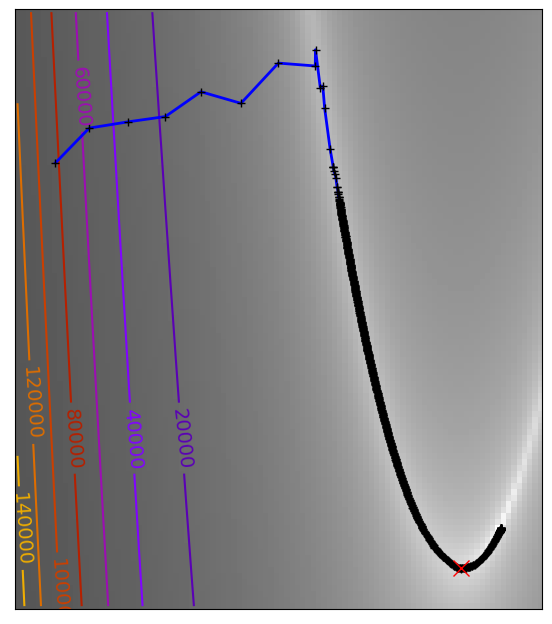

In [8]:
# нарисуем все это
plt.figure(figsize=(8,6))
plt.clf()
plt.axes([0,0,1,1])

# -------- рисуем фон ----------
plt.imshow(log_z,
           extent=[x_min,x_max,y_min,y_max],
           cmap=plt.cm.gray_r,
           origin='lower',
           vmax=log_z.min() + 1.5*log_z.ptp())

# Рисуем линии уровня функции
contours = plt.contour(z,
                       extent=[x_min,x_max,y_min,y_max],
                       cmap=plt.cm.gnuplot,
                       origin='lower')
plt.clabel(contours, inline=1, fontsize=14)

# нарисуем след работы метода
plt.plot(x_trace.T[0], x_trace.T[1], 'b-', linewidth=2)
plt.plot(x_trace.T[0], x_trace.T[1], 'k+')

# выделим точное решение задачи)
plt.plot([0], [0], 'rx', markersize=12)

plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.draw()

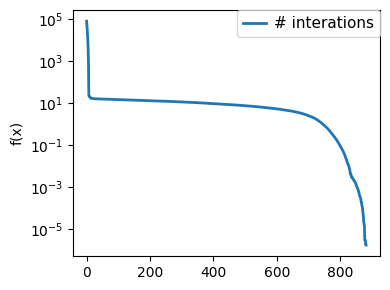

In [9]:
# Посмотрим как уменьшалось значение функции в зависимости от итерации
plt.figure(150, figsize=(4,3))
plt.clf()
plt.semilogy(np.maximum(f_trace, 1e-30), linewidth=2, label='# interations')
plt.ylabel('f(x)')
plt.legend(loc='upper right', frameon=True, prop=dict(size=11), borderaxespad=0, handlelength=1.5, handletextpad=0.5)
plt.tight_layout()
plt.draw()

#### tests

In [10]:

# test
p = []
p.append(np.random.uniform(-5, 5, size=2))
p.append(np.random.uniform(-5, 5, size=2))
p.append(np.random.uniform(-5, 5, size=2))
p.append(np.random.uniform(-5, 5, size=2))
p.append(np.random.uniform(-5, 5, size=2))

np.array(p).T[0]

array([ 1.25659392, -0.9258198 , -1.70903873, -0.2595146 ,  3.77525536])